In [1]:
import pandas as pd

# Load the Indian trending video data
df = pd.read_csv('INvideos.csv')

# Show the first 5 rows
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [2]:
# Check for missing values
df.isnull().sum()


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [3]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Remove duplicate video titles (some videos trend multiple times)
df = df.drop_duplicates(subset='title', keep='first')

# Reset index
df.reset_index(drop=True, inplace=True)

# Check the shape of the dataset
df.shape


(16431, 16)

In [4]:
top_views = df.sort_values(by='views', ascending=False).head(10)

top_views[['title', 'channel_title', 'views']]


,title,channel_title,views
1530,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,37736281
17,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,35885754
86,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,33523622
13104,VENOM - Official Trailer (HD),Sony Pictures Entertainment,27973210
1081,Swag Se Swagat Song | Tiger Zinda Hai | Salman...,YRF,24939458
2184,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24784863
15489,Sanju | Official Trailer | Ranbir Kapoor | Raj...,FoxStarHindi,21739537
10655,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,19716689
13103,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,18639195
2329,Jurassic World: Fallen Kingdom - Official Trai...,Universal Pictures,18184886


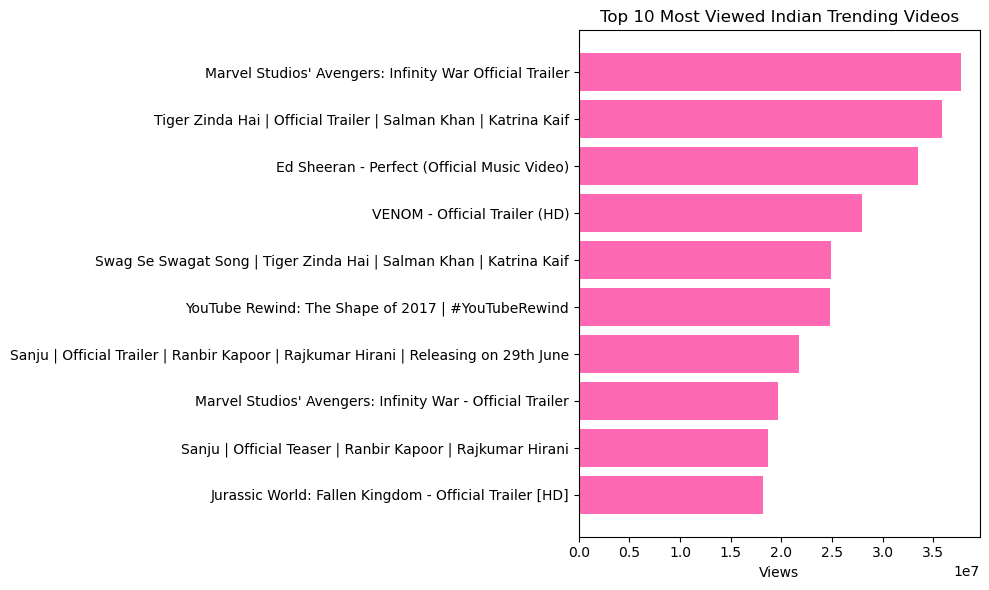

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_views['title'], top_views['views'], color='hotpink')
plt.xlabel("Views")
plt.title("Top 10 Most Viewed Indian Trending Videos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


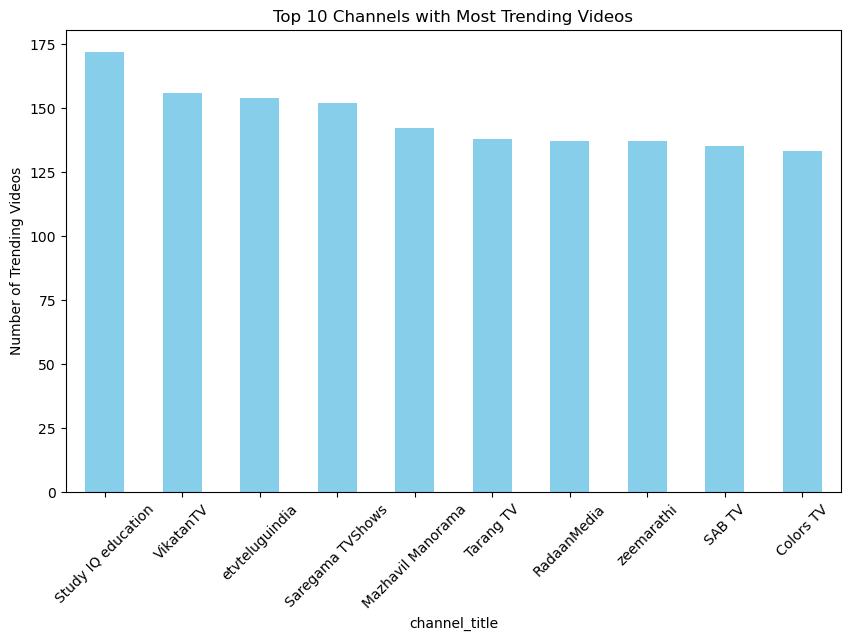

In [6]:
popular_channels = df['channel_title'].value_counts().head(10)

popular_channels.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Top 10 Channels with Most Trending Videos')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45)
plt.show()


In [7]:
df[['views', 'likes', 'comment_count']].corr()


,views,likes,comment_count
views,1.000000,0.785500,0.502698
likes,0.785500,1.000000,0.704587
comment_count,0.502698,0.704587,1.000000


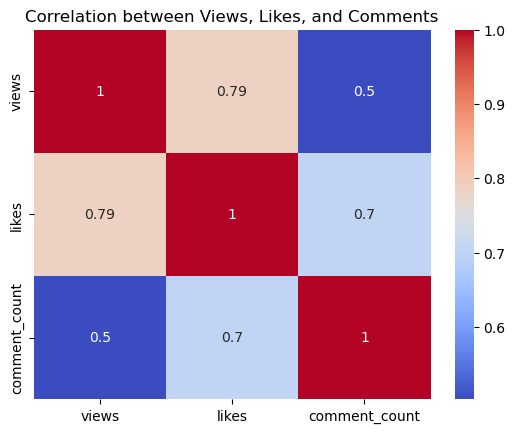

In [8]:
import seaborn as sns

sns.heatmap(df[['views', 'likes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Views, Likes, and Comments')
plt.show()


In [10]:
# Save cleaned data (optional)
df.to_csv('cleaned_youtube_trending.csv', index=False)
